In [1]:
import pandas as pd
import numpy as np
import regex as re
from collections import OrderedDict, Counter
from sklearn.utils import shuffle

In [2]:
log_file = 'HDFS_100k.log_structured.csv'

print("Loading", log_file)
struct_log = pd.read_csv(log_file, engine='c', na_filter=False, memory_map=True)

Loading HDFS_100k.log_structured.csv


In [4]:
struct_log.head()

,LineId,Date,Time,Pid,Level,Component,Content,EventId,EventTemplate
0,1,81109,203518,143,INFO,dfs.DataNode$DataXceiver,Receiving block blk_-1608999687919862906 src: ...,E5,Receiving block <*> src: /<*> dest: /<*>
1,2,81109,203518,35,INFO,dfs.FSNamesystem,BLOCK* NameSystem.allocateBlock: /mnt/hadoop/m...,E22,BLOCK* NameSystem.allocateBlock:<*>
2,3,81109,203519,143,INFO,dfs.DataNode$DataXceiver,Receiving block blk_-1608999687919862906 src: ...,E5,Receiving block <*> src: /<*> dest: /<*>
3,4,81109,203519,145,INFO,dfs.DataNode$DataXceiver,Receiving block blk_-1608999687919862906 src: ...,E5,Receiving block <*> src: /<*> dest: /<*>
4,5,81109,203519,145,INFO,dfs.DataNode$PacketResponder,PacketResponder 1 for block blk_-1608999687919...,E11,PacketResponder <*> for block <*> terminating


In [5]:
struct_log['Content']

0         Receiving block blk_-1608999687919862906 src: ...
1         BLOCK* NameSystem.allocateBlock: /mnt/hadoop/m...
2         Receiving block blk_-1608999687919862906 src: ...
3         Receiving block blk_-1608999687919862906 src: ...
4         PacketResponder 1 for block blk_-1608999687919...
                                ...                        
104810    Verification succeeded for blk_-87387097785867...
104811    Verification succeeded for blk_642047611142564...
104812    Verification succeeded for blk_-23823897510323...
104813    Verification succeeded for blk_485603173001003...
104814    Verification succeeded for blk_-49047501208105...
Name: Content, Length: 104815, dtype: object

In [11]:
data_dict = OrderedDict()
for idx, row in struct_log.iterrows():
    blkId_list = re.findall(r'(blk_-?\d+)', row['Content'])
    # print(blkId_list)
    if len(blkId_list)>1:
        print(blkId_list)
        break

['blk_-8213344449220111733', 'blk_-8213344449220111733']


In [13]:
for i in range(10):
    a=set([i, i+1]*10)
    print(a)

{0, 1}
{1, 2}
{2, 3}
{3, 4}
{4, 5}
{5, 6}
{6, 7}
{8, 7}
{8, 9}
{9, 10}


In [14]:
data_dict = OrderedDict()
for idx, row in struct_log.iterrows():
    blkId_list = re.findall(r'(blk_-?\d+)', row['Content'])
    # print(blkId_list)

    blkId_set = set(blkId_list)
    for blk_Id in blkId_set:
        if not blk_Id in data_dict:
            data_dict[blk_Id] = []
        data_dict[blk_Id].append(row['EventId'])

data_df = pd.DataFrame(list(data_dict.items()), columns=['BlockId', 'EventSequence'])

In [15]:
data_df

,BlockId,EventSequence
0,blk_-1608999687919862906,"[E5, E22, E5, E5, E11, E11, E9, E9, E11, E9, E..."
1,blk_7503483334202473044,"[E5, E5, E22, E5, E11, E9, E11, E9, E11, E9, E..."
2,blk_-3544583377289625738,"[E5, E22, E5, E5, E11, E9, E11, E9, E11, E9, E..."
3,blk_-9073992586687739851,"[E5, E22, E5, E5, E11, E9, E11, E9, E11, E9, E..."
4,blk_7854771516489510256,"[E5, E5, E22, E5, E11, E9, E11, E9, E11, E9, E..."
...,...,...
7935,blk_-1445970677921829671,"[E22, E5, E5, E5, E11, E9, E11, E9, E26, E26, ..."
7936,blk_-5943236831140622436,"[E22, E5, E5, E5, E26, E26, E26, E11, E9, E11,..."
7937,blk_-5039164935117450945,"[E22, E5, E5, E5, E26, E26, E11, E9, E11, E9, ..."
7938,blk_7379833155074044619,"[E22, E5, E5, E5, E26, E26, E11, E9, E11, E9, ..."


In [16]:
data_df = data_df.sample(frac=1, axis=0).reset_index(drop=True)

In [17]:
data_df

,BlockId,EventSequence
0,blk_2401760031778138677,"[E22, E5, E5, E5, E26, E26, E11, E11, E11, E9,..."
1,blk_-3691824481832516628,"[E5, E5, E22, E5, E26, E11, E11, E9, E9, E26, ..."
2,blk_-7999384923561831458,"[E22, E5, E5, E5, E26, E26, E26, E11, E9, E11,..."
3,blk_-4435506064356386631,"[E22, E5, E5, E5, E26, E26, E26, E11, E11, E9,..."
4,blk_6749875368376774840,"[E22, E5, E5, E5, E26, E26, E26, E11, E9, E11,..."
...,...,...
7935,blk_-6983269080690184035,"[E22, E5, E5, E5, E26, E26, E26, E11, E9, E11,..."
7936,blk_-5627472112861516032,"[E22, E5, E5, E5, E26, E26, E26, E11, E9, E11,..."
7937,blk_6385050489168251027,"[E22, E5, E5, E5, E26, E26, E11, E9, E11, E9, ..."
7938,blk_-7851573941192785283,"[E5, E22, E5, E5, E11, E9, E11, E9, E26, E26, ..."


In [56]:
def term_frequency(values):    
    """
    values: a list of log_sequence events
    
    returns X: matrix with the term frequence for every event in the log sequences 
    """
    
    X_counts = []
    for i in range(values.shape[0]):
        event_counts = Counter(values[i])
        X_counts.append(event_counts)
    X_df = pd.DataFrame(X_counts)
    X_df = X_df.fillna(0)
    X = X_df.values
    
    return X


In [57]:
def tf_idf(X):
    """    
    return X: matrix with the tf-idf for every event in the log sequences 

    """
    num_sequences = X.shape[0]
    df_vec = np.sum(X > 0, axis=0) 
    idf_vec = np.log(num_sequences / (df_vec + 1e-8))
    idf_matrix = X * np.tile(idf_vec, (num_sequences, 1)) 
    X = idf_matrix
    return X

In [58]:
def normalise(X):
    mean_vec = X.mean(axis=0)
    mean_vec = mean_vec.reshape(1, X.shape[1])
    X = X - np.tile(mean_vec, (X.shape[0], 1))
    return X

In [59]:
def preprocessing(data):
    """
    data: A dataframe with the Event_sequence column
    
    return a matrix X with the input vectorized with respect to tf-idf
    """
    values = data.iloc[:,1]
    print(values)
    X = term_frequency(values)
    X = tf_idf(X)
    X = normalise(X)
    
    return X

In [27]:
x=data_df.iloc[:,1]
values=x

In [32]:
X_counts = []
for i in range(values.shape[0]):
    event_counts = Counter(values[i])
    X_counts.append(event_counts)
X_df = pd.DataFrame(X_counts)
X_df = X_df.fillna(0)
X = X_df.values
X

array([[1., 3., 3., ..., 0., 0., 0.],
       [1., 3., 3., ..., 0., 0., 0.],
       [1., 3., 3., ..., 0., 0., 0.],
       ...,
       [1., 3., 3., ..., 0., 0., 0.],
       [1., 3., 3., ..., 0., 0., 0.],
       [1., 3., 3., ..., 0., 0., 0.]])

In [44]:
X.shape

(7940, 19)

In [37]:
X_df

,E22,E5,E26,E11,E9,E2,E7,E25,E18,E6,E16,E21,E13,E3,E27,E10,E14,E8,E15
0,1,3,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,3,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7935,1,3,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7936,1,3,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7937,1,3,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7938,1,3,3.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
num_sequences = X.shape[0]
print(num_sequences)
df_vec = np.sum(X > 0, axis=0) 
df_vec
idf_vec = np.log(num_sequences / (df_vec + 1e-8))
idf_matrix = X * np.tile(idf_vec, (num_sequences, 1)) 
X = idf_matrix

7940


In [74]:
df_vec

array([7940, 7940, 7816, 7817, 7816, 1448,   65,   24,   24,   24,   24,
         22,    8,    3,    1,    2,    2,    1,    1])

In [48]:
X

array([[-1.25943700e-12, -3.77831100e-12,  4.72210816e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.25943700e-12, -3.77831100e-12,  4.72210816e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.25943700e-12, -3.77831100e-12,  4.72210816e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.25943700e-12, -3.77831100e-12,  4.72210816e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.25943700e-12, -3.77831100e-12,  4.72210816e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.25943700e-12, -3.77831100e-12,  4.72210816e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [50]:
np.mean(X, axis=0)

array([-1.25943700e-12, -3.75467673e-12,  4.65430962e-02,  4.61117132e-02,
        4.64816414e-02,  4.67868583e-01,  4.11535425e-02,  1.97284128e-02,
        1.97284128e-02,  2.26511406e-02,  1.97284128e-02,  1.70577330e-02,
        2.08571094e-02,  4.03978577e-01,  1.13094062e-03,  3.13092747e-03,
        4.17456996e-03,  1.13094062e-03,  2.26188125e-03])

In [54]:
mean_vec = X.mean(axis=0)
# print(mean_vec)
# mean_vec = mean_vec.reshape(1, X.shape[1])
# print(mean_vec)
X = X - np.tile(mean_vec, (X.shape[0], 1))
X

array([[ 0.00000000e+00, -2.36342711e-14,  6.77985302e-04, ...,
        -4.17456996e-03, -1.13094062e-03, -2.26188125e-03],
       [ 0.00000000e+00, -2.36342711e-14,  6.77985302e-04, ...,
        -4.17456996e-03, -1.13094062e-03, -2.26188125e-03],
       [ 0.00000000e+00, -2.36342711e-14,  6.77985302e-04, ...,
        -4.17456996e-03, -1.13094062e-03, -2.26188125e-03],
       ...,
       [ 0.00000000e+00, -2.36342711e-14,  6.77985302e-04, ...,
        -4.17456996e-03, -1.13094062e-03, -2.26188125e-03],
       [ 0.00000000e+00, -2.36342711e-14,  6.77985302e-04, ...,
        -4.17456996e-03, -1.13094062e-03, -2.26188125e-03],
       [ 0.00000000e+00, -2.36342711e-14,  6.77985302e-04, ...,
        -4.17456996e-03, -1.13094062e-03, -2.26188125e-03]])

In [39]:
idf_vec = np.log(num_sequences / (df_vec + 1e-8))
idf_vec

array([-1.25943700e-12, -1.25943700e-12,  1.57403605e-02,  1.56124260e-02,
        1.57403605e-02,  1.70172998e+00,  4.80528128e+00,  5.80161472e+00,
        5.80161472e+00,  5.80161472e+00,  5.80161472e+00,  5.88862610e+00,
        6.90022701e+00,  7.88105626e+00,  8.97966854e+00,  8.28652137e+00,
        8.28652137e+00,  8.97966854e+00,  8.97966854e+00])

In [46]:
mean_vec = X.mean(axis=0)
mean_vec
# mean_vec = mean_vec.reshape(1, X.shape[1])
# X = X - np.tile(mean_vec, (X.shape[0], 1))

array([1.00000000e+00, 2.98123426e+00, 2.95692695e+00, 2.95352645e+00,
       2.95302267e+00, 2.74937028e-01, 8.56423174e-03, 3.40050378e-03,
       3.40050378e-03, 3.90428212e-03, 3.40050378e-03, 2.89672544e-03,
       3.02267003e-03, 5.12594458e-02, 1.25944584e-04, 3.77833753e-04,
       5.03778338e-04, 1.25944584e-04, 2.51889169e-04])

In [ ]:
n=[1,2,4,7,5]
n=np.array(n)

In [75]:
np.tile(n,(3,1))

array([[1, 2, 4, 7, 5],
       [1, 2, 4, 7, 5],
       [1, 2, 4, 7, 5]])

In [23]:
x[0]

['E22',
 'E5',
 'E5',
 'E5',
 'E26',
 'E26',
 'E11',
 'E11',
 'E11',
 'E9',
 'E9',
 'E9',
 'E26']

In [24]:
x

0       [E22, E5, E5, E5, E26, E26, E11, E11, E11, E9,...
1       [E5, E5, E22, E5, E26, E11, E11, E9, E9, E26, ...
2       [E22, E5, E5, E5, E26, E26, E26, E11, E9, E11,...
3       [E22, E5, E5, E5, E26, E26, E26, E11, E11, E9,...
4       [E22, E5, E5, E5, E26, E26, E26, E11, E9, E11,...
                              ...                        
7935    [E22, E5, E5, E5, E26, E26, E26, E11, E9, E11,...
7936    [E22, E5, E5, E5, E26, E26, E26, E11, E9, E11,...
7937    [E22, E5, E5, E5, E26, E26, E11, E9, E11, E9, ...
7938    [E5, E22, E5, E5, E11, E9, E11, E9, E26, E26, ...
7939    [E22, E5, E5, E5, E26, E26, E11, E9, E11, E9, ...
Name: EventSequence, Length: 7940, dtype: object

In [26]:
x[0], Counter(x[0])

(['E22',
  'E5',
  'E5',
  'E5',
  'E26',
  'E26',
  'E11',
  'E11',
  'E11',
  'E9',
  'E9',
  'E9',
  'E26'],
 Counter({'E22': 1, 'E5': 3, 'E26': 3, 'E11': 3, 'E9': 3}))

In [60]:
X = preprocessing(data_df)

0       [E22, E5, E5, E5, E26, E26, E11, E11, E11, E9,...
1       [E5, E5, E22, E5, E26, E11, E11, E9, E9, E26, ...
2       [E22, E5, E5, E5, E26, E26, E26, E11, E9, E11,...
3       [E22, E5, E5, E5, E26, E26, E26, E11, E11, E9,...
4       [E22, E5, E5, E5, E26, E26, E26, E11, E9, E11,...
                              ...                        
7935    [E22, E5, E5, E5, E26, E26, E26, E11, E9, E11,...
7936    [E22, E5, E5, E5, E26, E26, E26, E11, E9, E11,...
7937    [E22, E5, E5, E5, E26, E26, E11, E9, E11, E9, ...
7938    [E5, E22, E5, E5, E11, E9, E11, E9, E26, E26, ...
7939    [E22, E5, E5, E5, E26, E26, E11, E9, E11, E9, ...
Name: EventSequence, Length: 7940, dtype: object


In [61]:
from numpy import linalg as LA
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

In [62]:
def distance_metric(x1, x2):
    """
    Computes cosine similarity among the vectors x1 and x2
    """
    norm= LA.norm(x1) * LA.norm(x2)
    distance = 1 - np.dot(x1, x2) / (norm + 1e-8)
    if distance < 1e-8:
        distance = 0
    return distance

In [ ]:
def get_min_cluster_dist(instance_vec, reps):
    """
    Computes the minimum distance of the instance log sequence with reference to the representative log sequences
    
    Returns the minimum distance and the index of the cluster it is the nearest to.
    """
    min_index = -1
    min_dist = float('inf')
    for i in range(len(reps)):
        cluster_rep = reps[i]
        dist = distance_metric(instance_vec, cluster_rep)
        if dist < 1e-8:
            min_dist = 0
            min_index = i
            break
        elif dist < min_dist:
            min_dist = dist
            min_index = i
    return min_dist, min_index

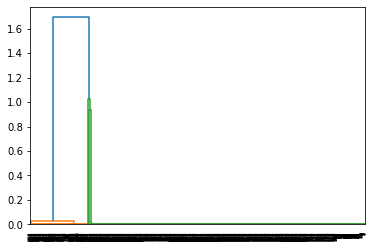

In [ ]:
max_dist = 0.3

X_bootstrap = X[0: 1000, :]
p_dist = pdist(X_bootstrap, metric= distance_metric)
Z = linkage(p_dist, 'complete')
cluster_index = fcluster(Z, max_dist, criterion='distance')

dn = dendrogram(Z)
plt.show()

In [68]:
len(cluster_index)

1000

In [77]:
cluster_index

array([4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4,
       4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4,
       4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 1, 1, 4, 4,
       4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4,
       1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 1, 1, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 1, 4,
       4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4,
       4, 1, 4, 4, 4, 3, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4,

In [66]:
set(cluster_index)

{1, 2, 3, 4}

In [83]:
representatives = list()
cluster_size_dict = dict()


num_clusters = len(set(cluster_index))
for clu in range(num_clusters):
    clu_idx = np.argwhere(cluster_index == clu + 1)[:, 0]
    # print(clu ,':',clu_idx)
    cluster_size_dict[clu] = clu_idx
    repre_center = np.average(X[clu_idx, :], axis=0)
    representatives.append(repre_center)

print(len(representatives))
print(cluster_size_dict)

4
{0: array([  5,  20,  23,  25,  36,  42,  44,  63,  67,  81,  82,  84,  85,
        91,  93, 100, 105, 110, 111, 112, 126, 132, 166, 169, 170, 182,
       189, 194, 196, 205, 207, 217, 221, 228, 229, 241, 242, 253, 260,
       271, 273, 275, 286, 292, 295, 303, 317, 328, 330, 337, 340, 345,
       353, 360, 367, 374, 390, 401, 410, 422, 428, 430, 437, 444, 445,
       457, 458, 488, 497, 500, 515, 517, 537, 544, 556, 558, 560, 568,
       574, 576, 580, 590, 594, 601, 605, 606, 608, 610, 615, 618, 626,
       630, 633, 647, 649, 655, 657, 658, 664, 666, 667, 668, 677, 684,
       688, 692, 695, 698, 699, 701, 704, 710, 713, 720, 722, 726, 733,
       735, 739, 744, 754, 759, 763, 764, 774, 781, 782, 787, 788, 792,
       800, 802, 809, 812, 815, 817, 822, 824, 825, 828, 833, 837, 840,
       843, 849, 852, 858, 864, 869, 874, 878, 884, 915, 916, 917, 922,
       924, 936, 937, 944, 946, 947, 948, 950, 951, 958, 961, 962, 963,
       965, 995, 996, 998], dtype=int64), 1: array([865, 9

In [78]:
representatives

[array([-1.78724327e-25, -2.36342711e-14,  6.77985302e-04,  7.25564887e-04,
         7.39440110e-04,  2.06997150e+00, -4.11535425e-02, -1.97284128e-02,
        -1.97284128e-02, -2.26511406e-02, -1.97284128e-02, -1.70577330e-02,
        -2.08571094e-02, -4.03978577e-01, -1.13094062e-03, -3.13092747e-03,
        -4.17456996e-03, -1.13094062e-03, -2.26188125e-03]),
 array([-1.78724327e-25, -1.28307127e-12,  1.64183458e-02,  7.25564887e-04,
         7.39440110e-04, -4.67868583e-01, -4.11535425e-02,  5.78188631e+00,
         5.78188631e+00,  5.77896358e+00,  5.78188631e+00,  5.87156837e+00,
        -2.08571094e-02, -4.03978577e-01, -1.13094062e-03, -3.13092747e-03,
        -4.17456996e-03, -1.13094062e-03, -2.26188125e-03]),
 array([-1.78724327e-25,  1.23580273e-12, -4.65430962e-02, -4.61117132e-02,
        -4.64816414e-02, -4.67868583e-01,  4.76412774e+00, -1.97284128e-02,
        -1.97284128e-02, -2.26511406e-02, -1.97284128e-02, -1.70577330e-02,
        -2.08571094e-02, -4.03978577e-01, 

In [70]:
for i in range(1000, X.shape[0]):
    if (i + 1) % 2000 == 0:
        print('Processed {} instances.'.format(i + 1))
    instance_vec = X[i, :]
    
    if len(representatives) > 0:
        min_dist, clu_id = get_min_cluster_dist(instance_vec, representatives)
        if min_dist <= max_dist:
            cluster_size_dict[clu_id] = np.append(cluster_size_dict[clu_id], i)
            representatives[clu_id] = representatives[clu_id] + (instance_vec - representatives[clu_id]) \
                                         / len(cluster_size_dict[clu_id])
            continue
    cluster_size_dict[len(representatives)] = np.array([i])
    representatives.append(instance_vec)

print('Processed {} instances.'.format(X.shape[0]))
print('Found {} clusters.\n'.format(len(representatives)))


Processed 2000 instances.
Processed 4000 instances.
Processed 6000 instances.
Processed 7940 instances.
Found 8 clusters.



In [71]:
cluster_size_dict

{0: array([   5,   20,   23, ..., 7913, 7930, 7938], dtype=int64),
 1: array([ 865,  997, 1177, 1297, 2068, 2083, 2454, 3033, 3037, 3598, 3670,
        3816, 4033, 4202, 4495, 4795, 5321, 5726, 6443, 6706, 7429, 7558],
       dtype=int64),
 2: array([ 152,  225,  381,  485,  579, 1128, 1153, 1188, 1229, 1277, 1689,
        2067, 2145, 2285, 2293, 2298, 2426, 2480, 2614, 2849, 3190, 3399,
        3656, 3728, 3732, 3760, 3900, 3916, 4100, 4177, 4178, 4383, 4469,
        4474, 4515, 4565, 4586, 4744, 4901, 5069, 5385, 5831, 5852, 5907,
        5909, 5958, 6201, 6407, 6589, 6687, 6860, 6884, 6948, 7000, 7001,
        7013, 7102, 7190, 7218, 7385, 7525, 7563, 7682], dtype=int64),
 3: array([   0,    1,    2, ..., 7936, 7937, 7939], dtype=int64),
 4: array([1250, 1407, 1883, 2513, 3787, 4976, 6273, 7406]),
 5: array([1354, 5098, 6063]),
 6: array([2983]),
 7: array([3806, 7476])}

In [72]:
def get_representative(log_array, centroid):
    """
    Returns the representative cluster based on the minimum distance from the centroid.
    """
    min_index = -1
    min_dist = float('inf')
    
    for i in range(len(log_array)):
        instance_vec = X[log_array[i],:]
        
        dist = distance_metric(instance_vec, centroid)
        
        if dist < min_dist:
            min_dist = dist
            min_index = i
    
    return log_array[min_index]

In [73]:
for i in range(len(representatives)):

    log_array = cluster_size_dict[i]
    centroid = representatives[i]
    z = get_representative(log_array, centroid)
    
    print("Representative for cluster {}:\n".format(i))
    print(data_df.iloc[z,:])
    print('=============================================================\n\n')

Representative for cluster 0:

BlockId                                    blk_8777422202136655045
EventSequence    [E5, E22, E5, E5, E11, E9, E11, E9, E11, E9, E...
Name: 5, dtype: object


Representative for cluster 1:

BlockId                                   blk_-7057732666118938934
EventSequence    [E22, E5, E5, E5, E26, E26, E11, E9, E11, E9, ...
Name: 865, dtype: object


Representative for cluster 2:

BlockId          blk_-5350492094942566244
EventSequence           [E22, E5, E5, E7]
Name: 152, dtype: object


Representative for cluster 3:

BlockId                                    blk_2401760031778138677
EventSequence    [E22, E5, E5, E5, E26, E26, E11, E11, E11, E9,...
Name: 0, dtype: object


Representative for cluster 4:

BlockId                                   blk_-5462418187886984774
EventSequence    [E22, E5, E5, E5, E13, E13, E26, E26, E26, E11...
Name: 1407, dtype: object


Representative for cluster 5:

BlockId                                   blk_-354458337728962